### AIE21080


### Question-1

Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the
amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse
transform the frequency spectrum to time domain signal.

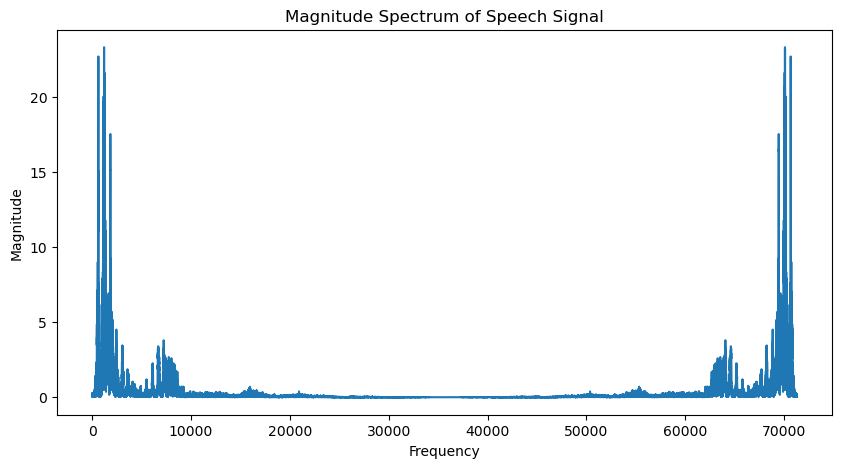

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


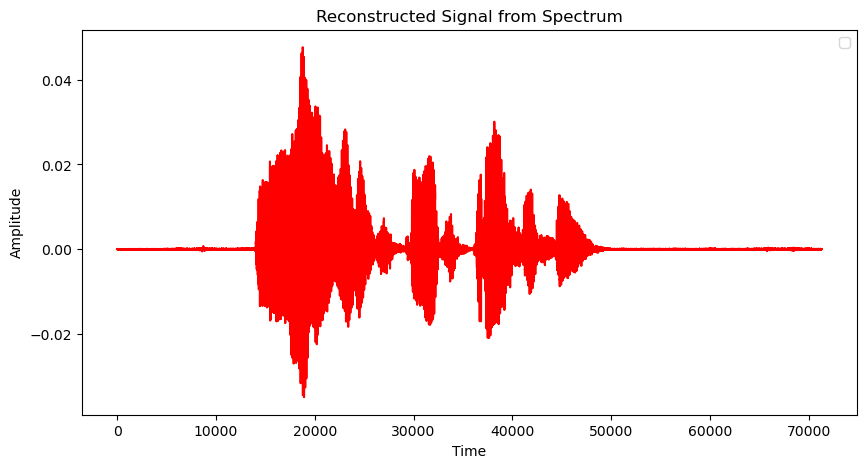

In [5]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('Lab05.mp3')
Y = np.fft.fft(y)
magnitude_spectrum = np.abs(Y)

# Amplitude of spectral components
plt.figure(figsize=(10, 5))
plt.plot(magnitude_spectrum)
plt.title('Magnitude Spectrum of Speech Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

# Inverse Transform (time domain)
y_reconstructed = np.fft.ifft(Y)

plt.figure(figsize=(10, 5))
plt.plot(y_reconstructed, color='r')
plt.title('Reconstructed Signal from Spectrum')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


### Question-2

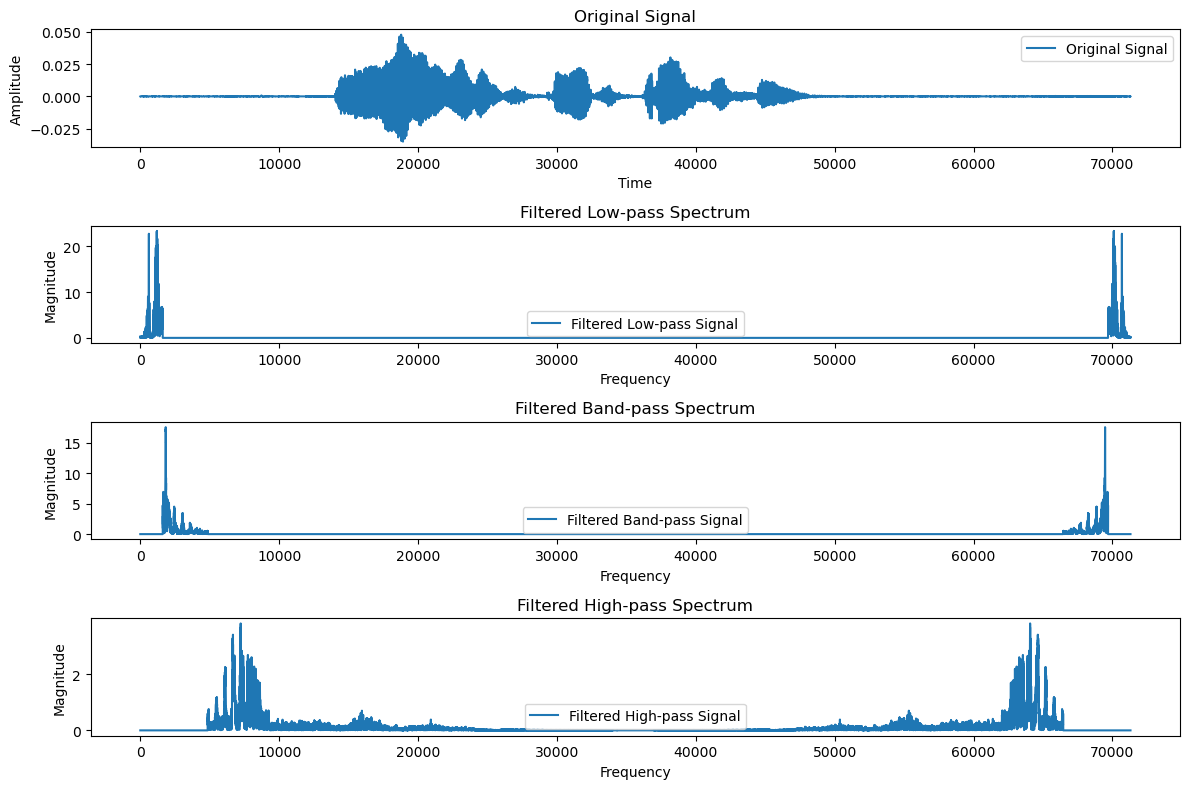

In [9]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load('Lab05.mp3')
Y = np.fft.fft(y)

magnitude_spectrum = np.abs(Y)

freq_axis = np.fft.fftfreq(len(Y), 1/sr)

def low_pass_filter(freqs, cutoff_freq):
    return (np.abs(freqs) <= cutoff_freq).astype(float)

def band_pass_filter(freqs, low_cutoff, high_cutoff):
    return ((np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)).astype(float)

def high_pass_filter(freqs, cutoff_freq):
    return (np.abs(freqs) >= cutoff_freq).astype(float)

# cutoff frequencies for filters
low_cutoff = 500  # Low-pass filter cutoff
band_low_cutoff = 500  # Band-pass filter low cutoff
band_high_cutoff = 1500  # Band-pass filter high cutoff
high_cutoff = 1500  # High-pass filter cutoff

low_pass_mask = low_pass_filter(freq_axis, low_cutoff)
band_pass_mask = band_pass_filter(freq_axis, band_low_cutoff, band_high_cutoff)
high_pass_mask = high_pass_filter(freq_axis, high_cutoff)

filtered_low_pass = Y * low_pass_mask
filtered_band_pass = Y * band_pass_mask
filtered_high_pass = Y * high_pass_mask

y_low_pass = np.fft.ifft(filtered_low_pass)
y_band_pass = np.fft.ifft(filtered_band_pass)
y_high_pass = np.fft.ifft(filtered_high_pass)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(y, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(np.abs(filtered_low_pass), label='Filtered Low-pass Signal')
plt.title('Filtered Low-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(np.abs(filtered_band_pass), label='Filtered Band-pass Signal')
plt.title('Filtered Band-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(np.abs(filtered_high_pass), label='Filtered High-pass Signal')
plt.title('Filtered High-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()



In [13]:
import IPython.display as ipd
print("Low Pass filter:")
ipd.display(ipd.Audio(y_low_pass, rate=sr))
print("Band Pass filter:")
ipd.display(ipd.Audio(y_band_pass, rate=sr))
print("High Pass filter:")
ipd.display(ipd.Audio(y_high_pass, rate=sr))

Low Pass filter:


### Question-3

Repeat Question-2 with other filter types such as Cosine / Gausian filters.


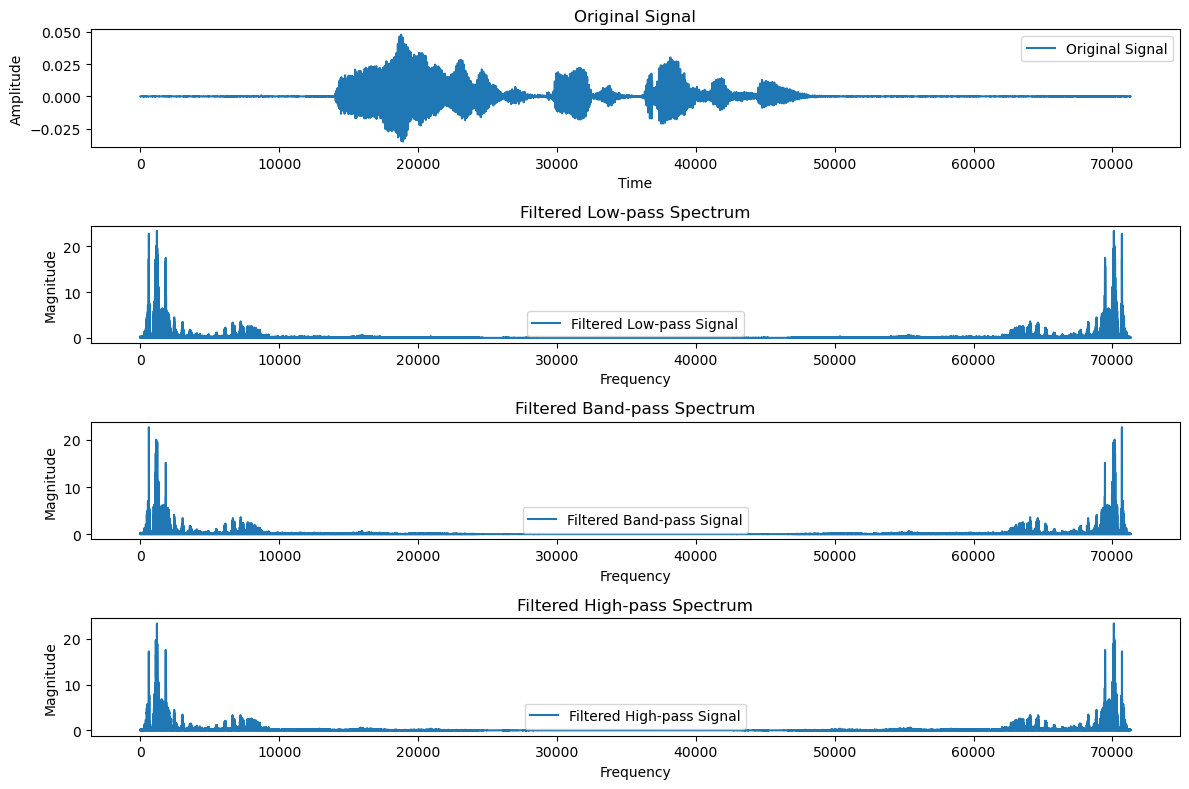

In [15]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load('Lab05.mp3')
Y = np.fft.fft(y)
magnitude_spectrum = np.abs(Y)
freq_axis = np.fft.fftfreq(len(Y), 1/sr)

def low_pass_filter(freqs, cutoff_freq):
    return (np.cos(np.pi * freqs * cutoff_freq / 2) > 0).astype(float)

def band_pass_filter(freqs, low_cutoff, high_cutoff):
    return ((np.cos(np.pi * freqs * low_cutoff / 2) > 0) & (np.cos(np.pi * freqs * high_cutoff / 2) > 0)).astype(float)

def high_pass_filter(freqs, cutoff_freq):
    return (np.cos(np.pi * freqs * cutoff_freq / 2) < 0).astype(float)


# cutoff frequencies for filters
low_cutoff = 500  # Low-pass filter cutoff
band_low_cutoff = 500  # Band-pass filter low cutoff
band_high_cutoff = 1500  # Band-pass filter high cutoff
high_cutoff = 1500  # High-pass filter cutoff

low_pass_mask = low_pass_filter(freq_axis, low_cutoff)
band_pass_mask = band_pass_filter(freq_axis, band_low_cutoff, band_high_cutoff)
high_pass_mask = high_pass_filter(freq_axis, high_cutoff)

filtered_low_pass = Y * low_pass_mask
filtered_band_pass = Y * band_pass_mask
filtered_high_pass = Y * high_pass_mask

y_low_pass = np.fft.ifft(filtered_low_pass)
y_band_pass = np.fft.ifft(filtered_band_pass)
y_high_pass = np.fft.ifft(filtered_high_pass)

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(y, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(np.abs(filtered_low_pass), label='Filtered Low-pass Signal')
plt.title('Filtered Low-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(np.abs(filtered_band_pass), label='Filtered Band-pass Signal')
plt.title('Filtered Band-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(np.abs(filtered_high_pass), label='Filtered High-pass Signal')
plt.title('Filtered High-pass Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()



In [16]:
print("Low Pass filter:")
ipd.display(ipd.Audio(y_low_pass, rate=sr))
print("Band Pass filter:")
ipd.display(ipd.Audio(y_band_pass, rate=sr))
print("High Pass filter:")
ipd.display(ipd.Audio(y_high_pass, rate=sr))

Low Pass filter:


Band Pass filter:


High Pass filter:
